# **Analysis of Nigerian Food Prices (January 2017 - July 2022)** 

Nigeria has been facing food price inflation for the past few years, coupled  with economic crises and poverty. 

it is also no news that the country has been fighting insecurity in form of insurgency, gang activities and an uptick in general social crimes. 

Analysis of available data shows that much of Nigeria's food-producing states are battling these violent activities.

### Import Libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns


## Load Main dataset
 Average National price of 43 Food Items in Nigeria (Jan 2017 - July 2022) 

In [17]:
df = pd.read_csv("prices.csv")

### Inspect data

In [18]:
print(df.shape)
df.head()

(67, 44)


,Date,Agric eggs (medium size),Agric egg (medium size),Beans (brown),Beans (white black eye),Beef (bone in),Beef (boneless),Bread sliced 500g,Bread unsliced 500g,Broken Rice (Ofada),...,Rice local (ofada),Rice Medium Grained,Rice (imported high quality),Sweet potato,Tilapia fish (epiya) fresh,Titus (frozen),Tomato,Vegetable oil,Wheat flour:,Yam tuber
0,31/01/2017,512.99,47.42,353.60,305.53,1001.24,1249.48,302.87,270.25,377.41,...,286.19,312.08,402.01,129.43,792.18,884.82,247.55,495.29,626.53,210.58
1,28/02/2017,520.16,42.90,337.11,309.85,995.65,1270.67,299.75,264.86,392.04,...,306.29,352.69,410.58,127.23,795.27,942.23,236.62,507.36,621.39,215.55
2,31/03/2017,507.69,43.93,353.28,318.45,1010.29,1281.71,297.51,262.33,421.54,...,308.87,377.99,418.71,132.94,798.07,964.63,268.64,513.42,623.10,255.86
3,30/04/2017,518.66,46.22,357.19,324.04,1035.45,1323.10,296.63,277.69,425.53,...,299.30,332.81,388.46,132.43,800.77,935.00,285.72,525.72,627.33,250.30
4,31/05/2017,522.71,45.73,365.86,332.28,1123.65,1378.91,307.70,282.26,460.10,...,323.82,350.36,410.55,130.28,805.21,969.64,339.72,524.77,646.18,279.15


In [19]:
#df.info()

In [20]:
# Check for missing values
#df.isna().sum()

In [21]:
# Round values to 2 decimal place
df = df.round(2)

In [22]:
# Convert "Date" to pandas datetime
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")

#### Load supporting dataset
##### Showing the state with the lowest and highest price for each food item

In [23]:
low_high = pd.read_csv("lowest_highest.csv")
low_high.head()

,Food Item,Description,Lowest,Highest
0,Agric eggs medium size,dozen,Borno (₦501.43),Rivers (₦910)
1,Agric egg medium size,one,Adamawa (₦60),Delta (₦82.33)
2,Beans brown,1kg,Borno (₦325.47),Ebonyi (₦926.58)
3,Beans: white black eye,1kg,Borno (₦317.73),Ebonyi (₦900.51)
4,"Beef, bone in",1kg,Taraba (₦1202.4),Abuja (₦1972.59)


## Explorative Data Analysis

In [24]:
# Set "Date" as index for easy plotting of timeseries data
df.set_index("Date", inplace=True)

In [25]:
df.head()

,Agric eggs (medium size),Agric egg (medium size),Beans (brown),Beans (white black eye),Beef (bone in),Beef (boneless),Bread sliced 500g,Bread unsliced 500g,Broken Rice (Ofada),Catfish (dried),...,Rice local (ofada),Rice Medium Grained,Rice (imported high quality),Sweet potato,Tilapia fish (epiya) fresh,Titus (frozen),Tomato,Vegetable oil,Wheat flour:,Yam tuber
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-31,512.99,47.42,353.60,305.53,1001.24,1249.48,302.87,270.25,377.41,2204.12,...,286.19,312.08,402.01,129.43,792.18,884.82,247.55,495.29,626.53,210.58
2017-02-28,520.16,42.90,337.11,309.85,995.65,1270.67,299.75,264.86,392.04,2150.18,...,306.29,352.69,410.58,127.23,795.27,942.23,236.62,507.36,621.39,215.55
2017-03-31,507.69,43.93,353.28,318.45,1010.29,1281.71,297.51,262.33,421.54,2189.55,...,308.87,377.99,418.71,132.94,798.07,964.63,268.64,513.42,623.10,255.86
2017-04-30,518.66,46.22,357.19,324.04,1035.45,1323.10,296.63,277.69,425.53,2189.10,...,299.30,332.81,388.46,132.43,800.77,935.00,285.72,525.72,627.33,250.30
2017-05-31,522.71,45.73,365.86,332.28,1123.65,1378.91,307.70,282.26,460.10,2213.66,...,323.82,350.36,410.55,130.28,805.21,969.64,339.72,524.77,646.18,279.15


In [26]:
# Format string to to use as annotaion in line plot
label = "Price per " + low_high["Description"]
high = "Most expensive price in " + low_high["Highest"]
low = "Cheapest price in " + low_high["Lowest"]

In [27]:
# Create dictionary of food items and appropriate index to aid plotting of data
dict_line = {'Agric eggs (medium size)':0, 'Agric egg (medium size)':1,
       'Beans (brown)':2, 'Beans (white black eye)':3, 'Beef (bone in)':4,
       'Beef (boneless)':5, 'Bread sliced 500g':6, 'Bread unsliced 500g':7,
       'Broken Rice (Ofada)':8, 'Catfish (dried)':9,
       'Catfish (obokun) fresh':10, 'Catfish (smoked)':11, 'Chicken Feet':12,
       'Chicken Wings':13, 'Dried Fish Sardine':14,
       'Evaporated tinned milk carnation':15, 'Evaporated tinned milk(peak) ':16,
       'Frozen chicken':17, 'Gaari white':18, 'Gaari yellow':19, 'Groundnut oil':20,
       'Iced Sardine':21, 'Irish potato':22, 'Mackerel (frozen)':23,
       'Maize grain white':24, 'Maize grain yellow':25, 'Mudfish (aro) fresh':26,
       'Mudfish (aro) dried':27, 'Onion bulb':28, 'Palm oil':29, 'Plantain (ripe)':30,
       'Plantain (unripe)':31, 'Rice agric':32, 'Rice local (ofada)':33,
       'Rice Medium Grained':34, 'Rice (imported high quality)':35, 'Sweet potato':36,
       'Tilapia fish (epiya) fresh':37, 'Titus (frozen)':38, 'Tomato':39,
       'Vegetable oil':40, 'Wheat flour:':41, 'Yam tuber':42}

In [28]:
# Define functions

# max price of item
def maxi(x):
  m = df[x].max()
  return m
# min price of item
def mini(x):
  n = df[x].min()
  return n
# current  price of item
def price(x):
  p = df[x].tail(1)[0]
  return p


In [29]:
def line(x):
  """ 
  A function that takes in a food item and returns a line plot of the national price from January 2017 to July 2022.
  It also annotates the current national price, the price and location where it is the cheapest and most expensive
  """
  # define variables
  max_price = maxi(x)
  min_price= mini(x)
  current_price = price(x)
 

  # plot graph 
  fig, ax = plt.subplots(figsize=(15,10))
  ax.plot(df[x])
  plt.ylabel("Price in Naira (₦)", fontsize=15)
  plt.xlabel("Year", fontsize=15)
  fig.text(0.15, 0.85, "National Price of " + x + " ( Jan 2017 - July 2022)", fontsize=18)
  fig.text(0.67, 0.26, label[dict_line[x]] + " as at July 2022", fontsize=13)
  fig.text(0.67, 0.17, high[dict_line[x]], fontsize=13)
  fig.text(0.67, 0.20, low[dict_line[x]], fontsize=13)
  fig.text(0.67, 0.23, "Current national price at " + "₦"+ str(current_price), fontsize=13)
  for s in ['top', 'right']:
     ax.spines[s].set_visible(False);

### **Showing the national price of six food items accross the year range**

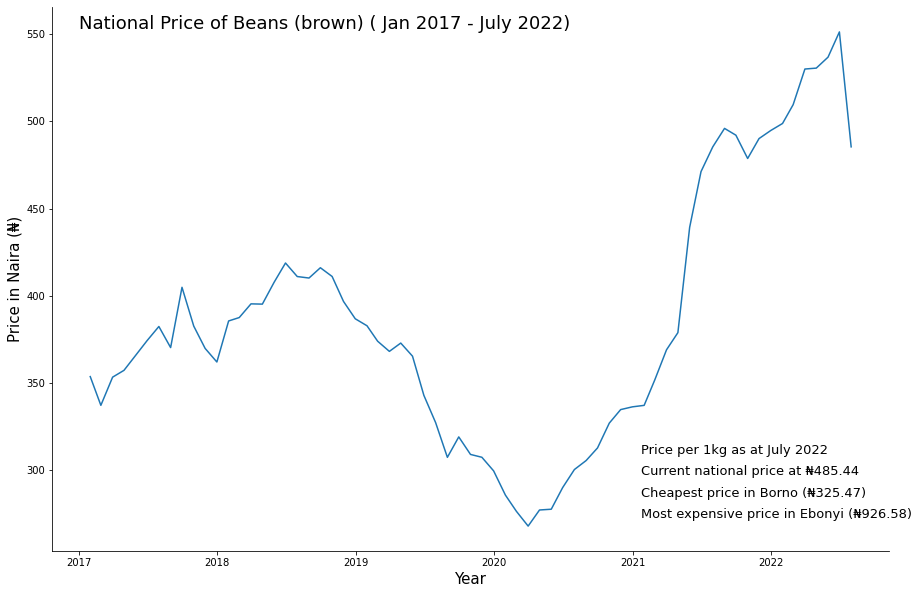

In [31]:
line('Beans (brown)')

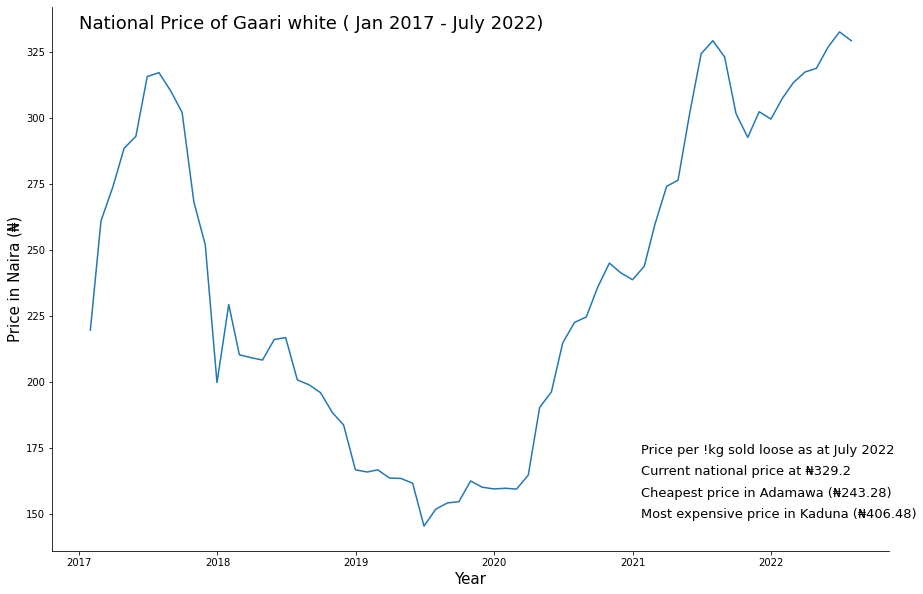

In [32]:
line('Gaari white')

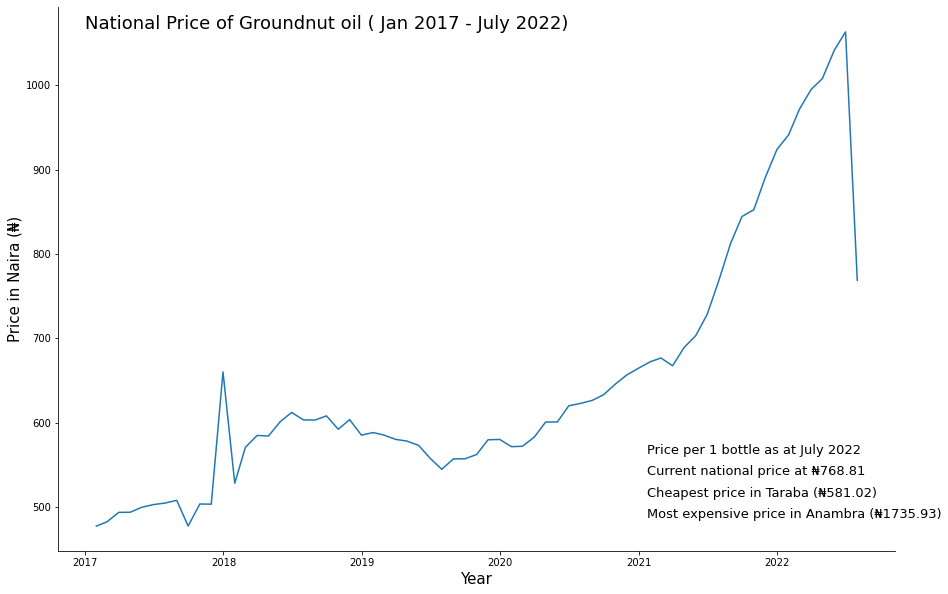

In [33]:
line('Groundnut oil')

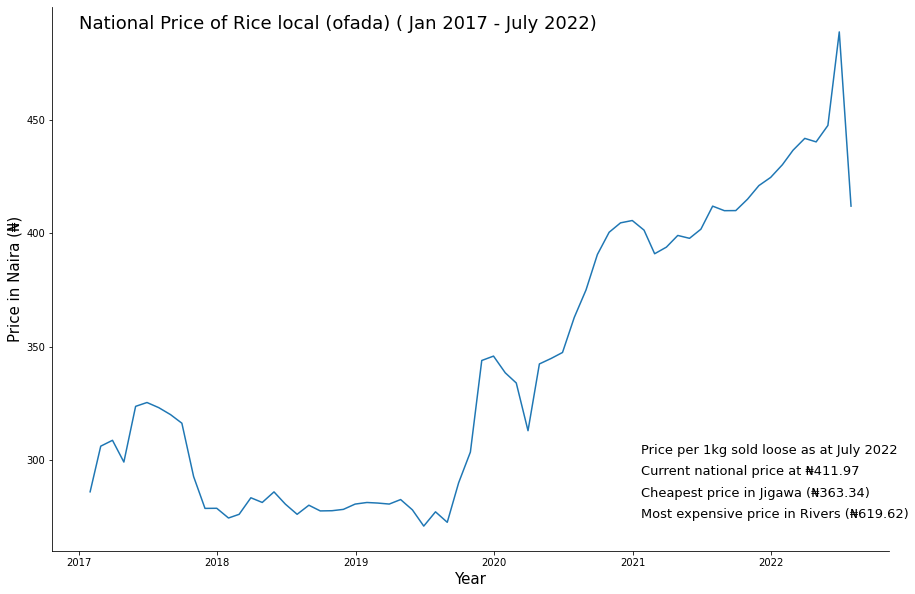

In [34]:
line('Rice local (ofada)')

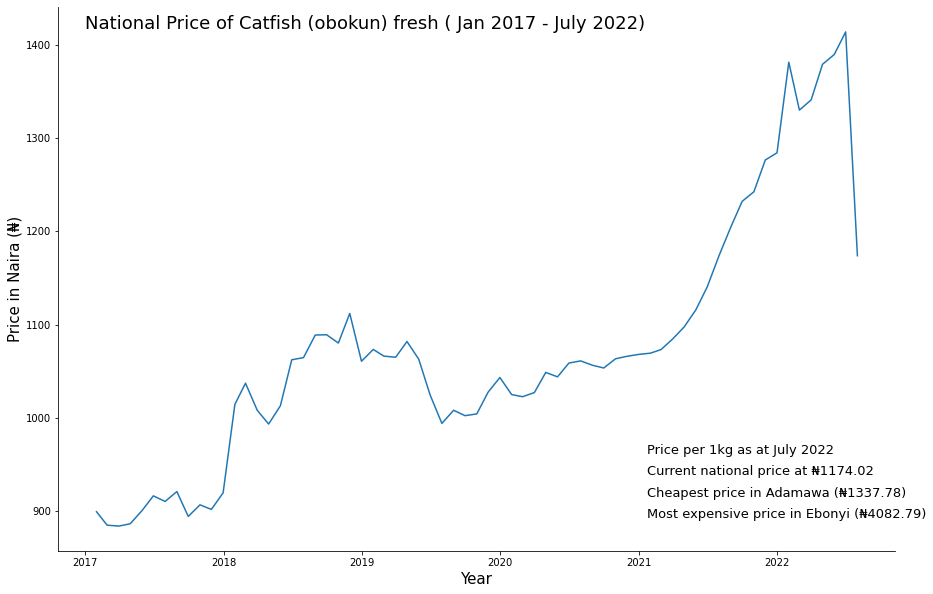

In [35]:
line('Catfish (obokun) fresh')

## **Comparing current prices (July 2022) of major food items across geopolitical zones**

#### Load data

In [36]:
zones = pd.read_csv("zone_prices.csv")
zones

,Geopolitical Zones,"Beans brown,sold loose",Beef (boneless),Bread sliced 500g,Gaari white (sold loose),Onion bulb,Palm oil: 1 bottle (specify bottle),Rice local (sold loose),Tomato,Wheat flour: prepacked (golden penny 2kg),Yam tuber
0,NORTH CENTRAL,386.184041,1524.440217,332.402831,272.953167,207.022346,572.425028,401.723493,227.330525,819.462146,191.849392
1,NORTH EAST,379.032304,1576.951470,326.663704,270.692088,188.175965,606.154603,419.773473,194.720652,838.458011,168.155191
2,NORTH WEST,487.997887,1945.430477,440.270176,521.499012,510.140152,1065.537336,796.025992,656.939402,1129.354545,543.979936
3,SOUTH EAST,853.192759,2579.403467,645.943590,390.268378,536.068255,1094.023935,467.827539,678.803834,1342.914286,479.097375
4,SOUTH SOUTH,579.927014,2115.790993,505.520931,285.652144,601.002624,850.486866,463.028513,609.781538,1057.081982,468.645450
5,SOUTH WEST,598.003613,2084.208330,502.292677,296.501358,441.977823,1014.104108,519.644608,496.208650,1155.383191,538.016557


In [37]:
# Get column names from zones dataset
columns = ['Beans brown,sold loose', 'Beef (boneless)', 'Bread sliced 500g',
       'Gaari white (sold loose)', 'Onion bulb',
       'Palm oil: 1 bottle (specify bottle)', 'Rice local (sold loose)',
       'Tomato', 'Wheat flour: prepacked (golden penny 2kg)', 'Yam tuber']
# Create list "max" that contains the highest price per item
max = []
for c in columns:
  max.append(zones[c].max())
max

[853.1927586,
 2579.403467,
 645.9435902,
 521.499012,
 601.0026235,
 1094.023935,
 796.0259923,
 678.8038337,
 1342.914286,
 543.979936]

In [38]:
#zones.T.to_csv("zones_1.csv")
zones_1 = pd.read_csv("zones_1.csv")
zones_1

,Food Items,NORTH CENTRAL,NORTH EAST,NORTH WEST,SOUTH EAST,SOUTH SOUTH,SOUTH WEST
0,"Beans brown,sold loose",386.184041,379.032304,487.997887,853.192759,579.927014,598.003613
1,Beef (boneless),1524.440217,1576.951470,1945.430477,2579.403467,2115.790993,2084.208330
2,Bread sliced 500g,332.402831,326.663704,440.270176,645.943590,505.520931,502.292677
3,Gaari white (sold loose),272.953167,270.692088,521.499012,390.268378,285.652144,296.501358
4,Onion bulb,207.022346,188.175965,510.140152,536.068255,601.002624,441.977823
5,Palm oil: 1 bottle (specify bottle),572.425028,606.154603,1065.537336,1094.023935,850.486866,1014.104108
6,Rice local (sold loose),401.723493,419.773473,796.025992,467.827539,463.028513,519.644608
7,Tomato,227.330525,194.720652,656.939402,678.803834,609.781538,496.208650
8,Wheat flour: prepacked (golden penny 2kg),819.462146,838.458011,1129.354545,1342.914286,1057.081982,1155.383191
9,Yam tuber,191.849392,168.155191,543.979936,479.097375,468.645450,538.016557


### Visualise Dataset into a *Formatted* Table

In [39]:
val = [[386.1840411,1524.440217,332.4028314,272.9531667,207.0223462,572.4250284,401.7234927,227.3305247,819.4621459,191.8493924],
      [379.0323035,1576.95147,326.6637037,270.6920883,188.1759649,606.1546032,419.7734734,194.7206519,838.4580111,168.1551907],
      [487.9978871,1945.430477,440.2701763,521.499012,510.140152,1065.537336,796.0259923,656.9394016,1129.354545,543.979936],
      [853.1927586,2579.403467, 645.9435902,390.268378,536.0682546,1094.023935,467.8275394,678.8038337,1342.914286,479.0973747],
      [579.927014,2115.790993,505.5209314,285.6521444,601.0026235,850.4868658,463.0285133,609.7815379,1057.081982,468.6454505],
      [598.0036126,2084.20833,502.2926772,296.5013584,441.9778229,1014.104108,519.6446083,496.2086505,1155.383191,538.0165566]]

In [40]:
# Set formatting conditions
font_color = ['rgb(40,40,40)'] + [['rgb(255,0,0)' if v == 853.1927586 or v == 2579.403467 or v == 645.9435902 or 
                                                     v ==  521.499012 or v == 601.0026235 or v == 1094.023935 or
                                                     v == 796.0259923 or v == 678.8038337 or v == 1342.914286 or
                                                     v == 543.979936
                                                   else 'rgb(10,10,10)' for m in max for v in val[k]] for k in range(6)]
# Plot data
fig = go.Figure(data=[go.Table(
header=dict(values=list(zones_1.columns),
                align='left',
                font = dict(color=['rgb(45,45,45)']*2, size=14)),
cells=dict(values=zones_1.transpose().values.tolist(),
               align='left', font = dict(color = font_color),
               format = [None, ",.2f"],
               prefix = [None, '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦']))
                ])
fig.update_layout(title="Average Prices of Selected Food Items per Geopolitical Zones (July 2022)<br>(Highest Prices in Red)")
fig.show()

We can observe that food is generally more expensive in the **south east** with north-west coming in next. Food is cheaper in the **north central** except **yam** that is cheaper in North East (**Taraba** is one of the yam-producing states in the country.)

## **Current percentage monthly and yearly increase in the price of food items on a national level**

In [41]:
# Load data
increase = pd.read_csv("MoM_YoY.csv")

# Food item with least increase
increase.head()

,Items,Monthly increase,Yearly increase
0,Agric egg (medium size price of one),3.61,34.72
1,"Evaporated tinned milk(peak), 170g",3.38,31.65
2,Bread sliced 500g,2.92,34.66
3,Bread unsliced 500g,2.91,33.21
4,Evaporated tinned milk carnation 170g,2.66,26.00


In [42]:
# Food item with most increase
increase.tail()

,Items,Monthly increase,Yearly increase
38,"Gari yellow,sold loose",-2.31,-0.56
39,Rice agric sold loose,-2.55,7.50
40,"Gari white,sold loose",-2.82,-1.83
41,Maize grain white sold loose,-2.87,14.22
42,Rice local sold loose,-4.27,13.55


## **Comparing current prices (July 2022) of six food items across six states**
The current price of **six** major food items (*from high and low percentage increase*)
 of a state in the six geopolitical zones is visualised to emphasise the price inflation in the southeast state(**Imo**) compared to other states.


In [43]:
current_price = pd.read_csv("current_price_six_states.csv")
current_price.head()

,State,"Beans brown,sold loose",Bread sliced 500g,Broken Rice (Ofada),"Gari white,sold loose",Rice local sold loose,"Palm oil: 1 bottle,specify bottle","Vegetable oil:1 bottle,specify bottle",Tomato,Yam tuber
0,Lagos,499.96,529.41,881.21,385.90,552.27,986.32,1090.70,574.85,673.97
1,Bayelsa,688.95,619.54,799.60,326.89,544.84,997.90,1211.11,725.54,546.75
2,Imo,790.76,672.03,547.64,381.06,463.27,1152.55,1457.78,755.14,486.47
3,Borno,325.47,300.00,487.97,246.68,460.48,609.05,613.03,187.15,163.11
4,Kaduna,492.57,494.38,470.37,406.48,468.81,1068.67,1173.91,537.16,416.67


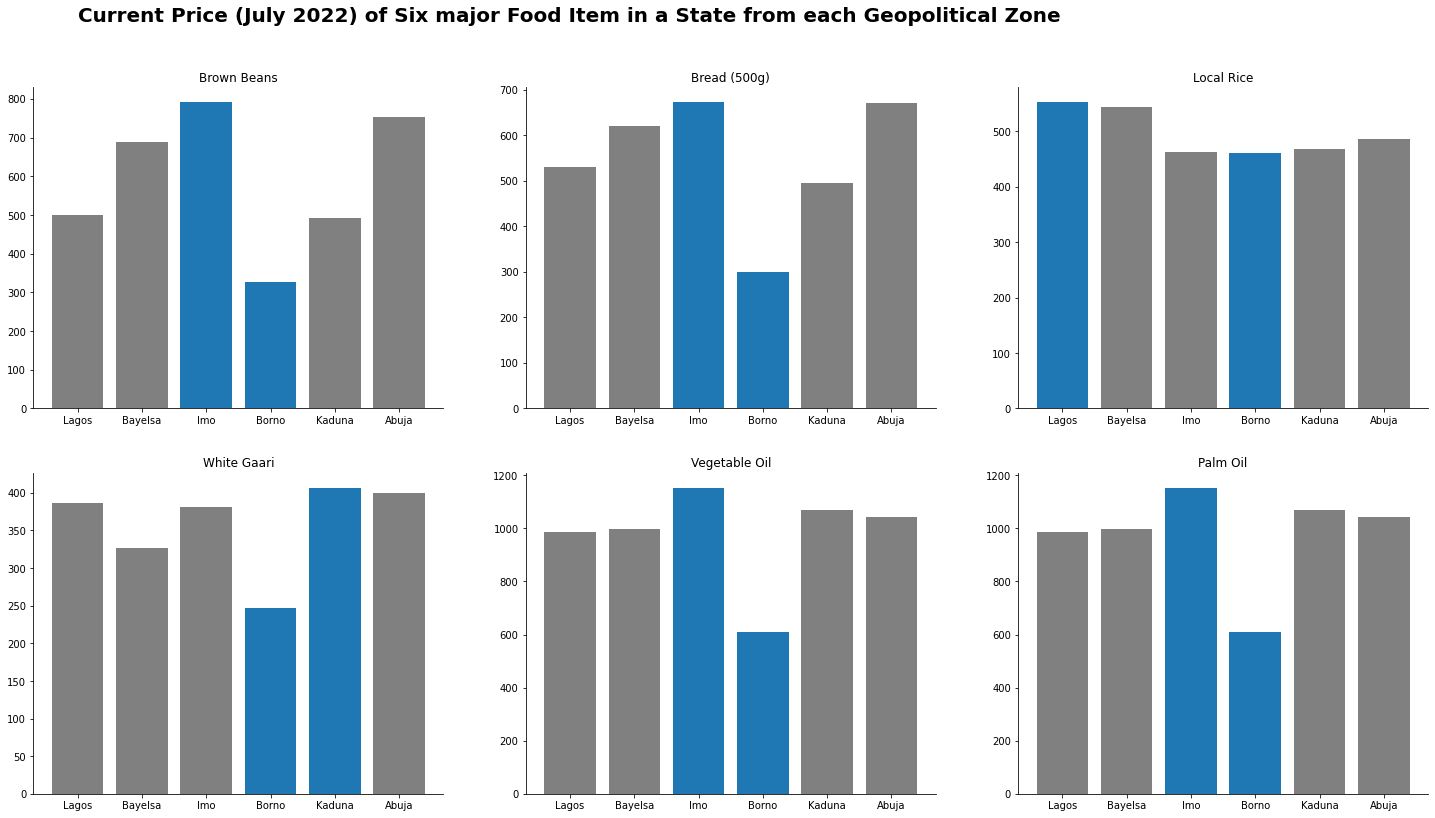

In [44]:
# Visualise
fig, ax = plt.subplots(2,3, figsize=(25,13))

color_1 = ["grey" for i in range(6)]
color_1[2] = color_1[3] = "#1f77b4"        # color highlight
ax[0,0].bar(current_price["State"], current_price["Beans brown,sold loose"], color=color_1)
ax[0,0].title.set_text("Brown Beans")
for s in ['top', 'right']:
    ax[0,0].spines[s].set_visible(False)

color_2 = ["grey" for i in range(6)]
color_2[2] = color_2[3] = "#1f77b4"
ax[0,1].bar(current_price["State"], current_price["Bread sliced 500g"], color=color_2)
ax[0,1].title.set_text("Bread (500g)")
for s in ['top', 'right']:
    ax[0,1].spines[s].set_visible(False)

color_3 = ["grey" for i in range(6)]
color_3[0] = color_3[3] = "#1f77b4"
ax[0,2].bar(current_price["State"], current_price["Rice local sold loose"], color=color_3)
ax[0,2].title.set_text("Local Rice")
for s in ['top', 'right']:
    ax[0,2].spines[s].set_visible(False)

color_4 = ["grey" for i in range(6)]
color_4[4] = color_4[3] = "#1f77b4"
ax[1,0].bar(current_price["State"], current_price["Gari white,sold loose"], color = color_4)
ax[1,0].title.set_text("White Gaari")
for s in ['top', 'right']:
    ax[1,0].spines[s].set_visible(False)

color_5 = ["grey" for i in range(6)]
color_5[2] = color_5[3] = "#1f77b4"
ax[1,1].bar(current_price["State"], current_price["Palm oil: 1 bottle,specify bottle"], color=color_5)
ax[1,1].title.set_text("Vegetable Oil")
for s in ['top', 'right']:
    ax[1,1].spines[s].set_visible(False)

color_6 = ["grey" for i in range(6)]
color_6[2] = color_6[3] = "#1f77b4"
ax[1,2].bar(current_price["State"], current_price["Palm oil: 1 bottle,specify bottle"], color=color_5)
ax[1,2].title.set_text("Palm Oil")
for s in ['top', 'right']:
    ax[1,2].spines[s].set_visible(False)

fig.text(0.15, 0.95, "Current Price (July 2022) of Six major Food Item in a State from each Geopolitical Zone", fontsize=20,fontweight="semibold");

## **Looking into correllations**

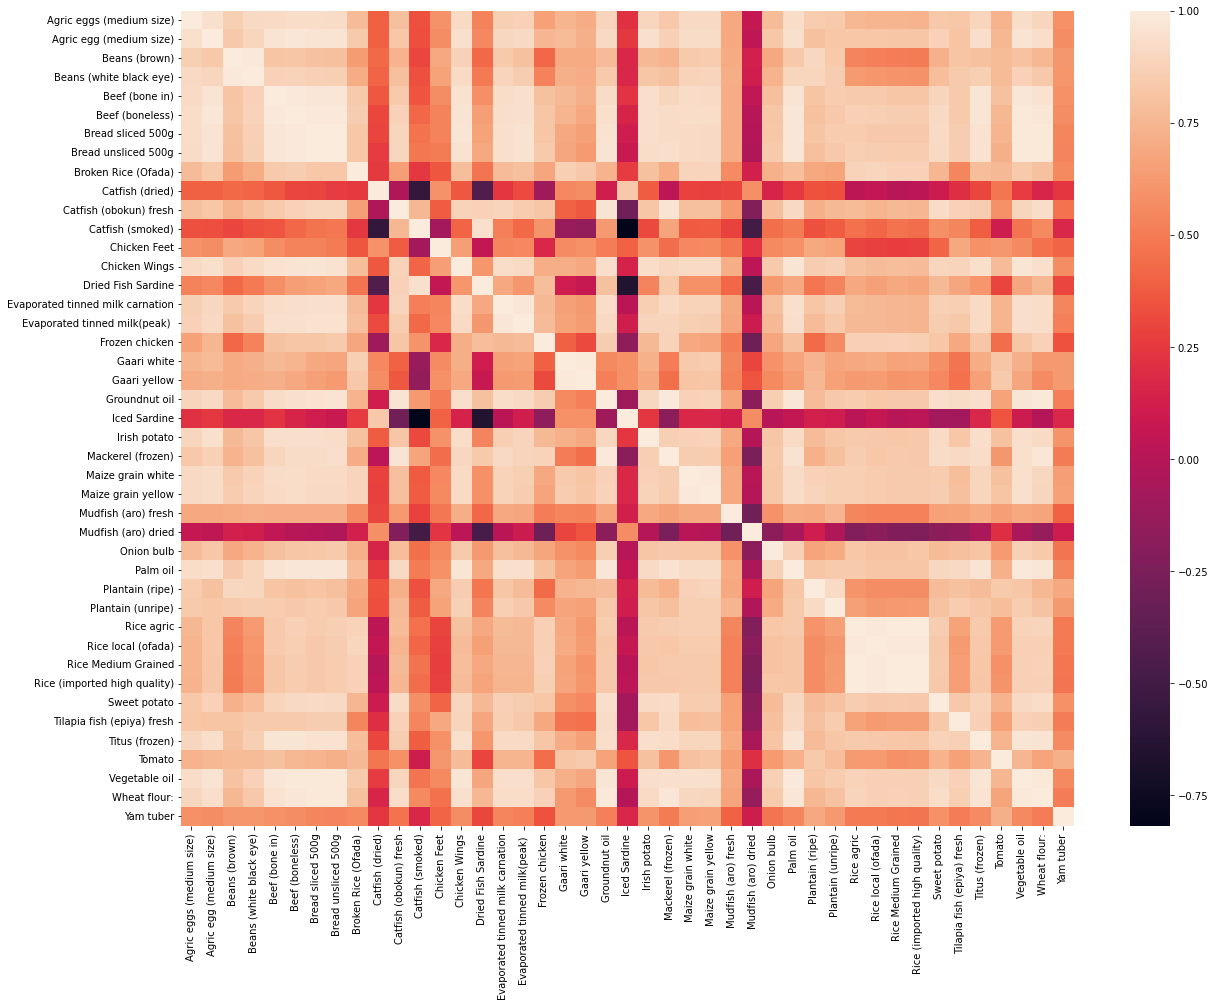

In [45]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(corr, ax=ax);

From the heat map above we can observe

Positive correlation between
- Both forms of bread, beans, gaari, and maize
- The four forms of rice (imported, ofada, broken and medium grained)
- Groundnut oil, palm oil and vegetable oil
- Irish potato, palm oil and veg oil
- milk, bread, veg oil and wheat flour
- Maize chicken wings and vegetable oil

Negative correlation between
- Dried mudfish, fresh mudfish
- Iced sardine, dried fish sardine and smoked catfish 


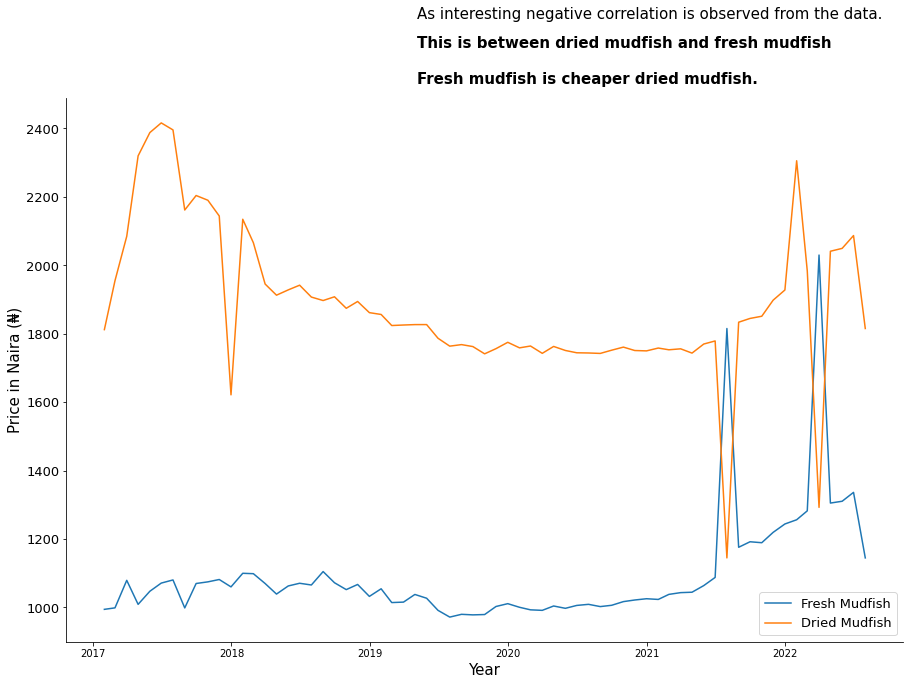

In [50]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(df["Mudfish (aro) fresh"], label="Fresh Mudfish")
ax.plot(df["Mudfish (aro) dried"], label="Dried Mudfish")
plt.ylabel("Price in Naira (₦)", fontsize=15)
plt.xlabel("Year", fontsize=15)
ax.legend(loc="lower right", fontsize=13)
ax.tick_params(axis='y', labelsize=13)
fig.text(0.45, 0.99,"As interesting negative correlation is observed from the data.", fontsize=15)
fig.text(0.45, 0.95,"This is between dried mudfish and fresh mudfish ", fontsize=15, fontweight="bold")
fig.text(0.45, 0.90,"Fresh mudfish is cheaper dried mudfish.", fontsize=15,fontweight="bold")
for s in ['top', 'right']:
     ax.spines[s].set_visible(False);

# **What are the causes of food inflation?**
### **Influence of Covid19 Pandemic**
On a general scale, all the food prices had a rise in **2021** but the prices of certain food items were geatly influenced by the covid19 pandemic as a huge rise is observed. The food items are; 
- White and yellow gaari
- White and yellow maize
- The four forms of rice (imported, ofada, broken and medium grained)
- Vegetable oil, groundnut oil and Palm oil

We can observe that they are majorly grains and their line plots are shown below

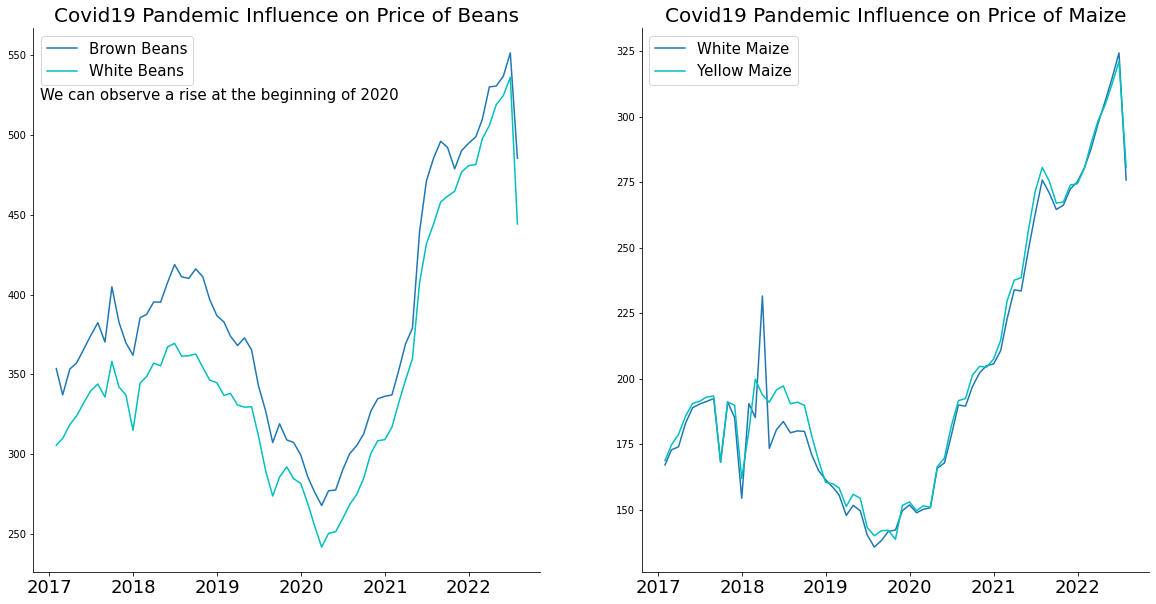

In [51]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.plot(df["Beans (brown)"], label= "Brown Beans")
ax1.plot(df["Beans (white black eye)"], label="White Beans", color="c")
#ax1.axvline("2020-03-31",color ='grey', lw = 0.5, alpha = 0.75)
#ax1.text("2020-04-30", 230, "March 2020")
for s in ['top', 'right']:
     ax1.spines[s].set_visible(False)
ax1.set_title("Covid19 Pandemic Influence on Price of Beans", fontsize=20)
ax1.legend(fontsize=15)
ax1.xaxis.set_tick_params(labelsize = 18)
fig.text(0.13, 0.78, "We can observe a rise at the beginning of 2020", fontsize=15)
#fig.text(0.63, 0.75, "We can observe a steady rise at the beginning of 2020", fontsize=15)
ax2.plot(df["Maize grain white"], label="White Maize")
ax2.plot(df["Maize grain yellow"], label="Yellow Maize", color="c")
#ax2.axvline("2019-11-30",color ='grey', lw = 0.5, alpha = 0.75)
#ax2.text("2019-12-31", 129, "November 2019")
for s in ['top', 'right']:
     ax2.spines[s].set_visible(False)
ax2.set_title("Covid19 Pandemic Influence on Price of Maize", fontsize=20)
ax2.xaxis.set_tick_params(labelsize = 18)
ax2.legend(fontsize=15);


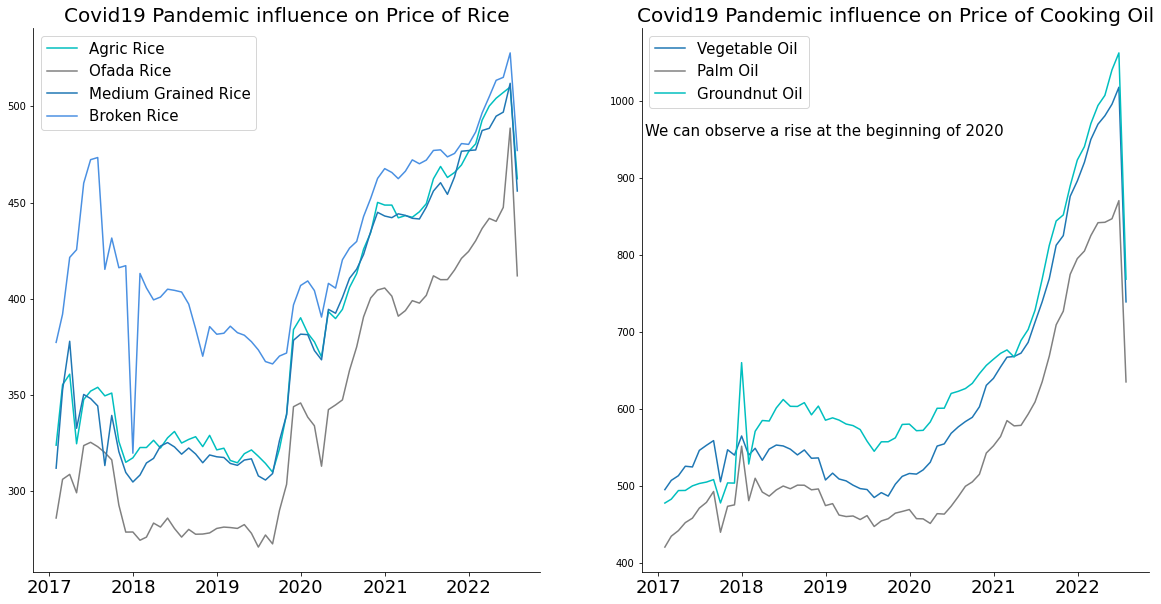

In [52]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.plot(df["Rice agric"], label="Agric Rice", color="c")
ax1.plot(df["Rice local (ofada)"], label="Ofada Rice", color="grey")
ax1.plot(df["Rice Medium Grained"], label="Medium Grained Rice")
ax1.plot(df["Broken Rice (Ofada)"], label="Broken Rice", color="#4a90e2")
# ax1.axvline("2019-11-30",color ='grey', lw = 0.5, alpha = 0.75)
# ax1.text("2019-12-31", 260, "November 2019")
for s in ['top', 'right']:
     ax1.spines[s].set_visible(False)
ax1.set_title("Covid19 Pandemic influence on Price of Rice", fontsize=20)
ax1.legend(fontsize=15)
ax1.xaxis.set_tick_params(labelsize = 18)

ax2.plot(df["Vegetable oil"], label="Vegetable Oil")
ax2.plot(df["Palm oil"], label="Palm Oil", color="grey")
ax2.plot(df["Groundnut oil"], label="Groundnut Oil", color="c")
# ax2.axvline("2020-01-31",color ='grey', lw = 0.5, alpha = 0.75)
# ax2.text("2020-02-28", 400, "January 2020")
for s in ['top', 'right']:
     ax2.spines[s].set_visible(False)
ax2.set_title("Covid19 Pandemic influence on Price of Cooking Oil", fontsize=20)
ax2.legend(fontsize=15)
ax2.xaxis.set_tick_params(labelsize = 18)
fig.text(0.55, 0.73, "We can observe a rise at the beginning of 2020", fontsize=15)
plt.savefig("covid", dpi=300, bbox_inches="tight");

From the plots above we can see a rise in the price of the price items after the grey line that indicates the covid19 pandemic

### **Influence of Insecurities in the Country**
In Nigeria, the leading producing states include: Niger, Kano, Jigawa, Zamfara,Kebbi, Sokoto, Katsina, Kaduna, Adamawa, Yobe, Borno, Taraba, Plateau, Nasarawa, Bauchi, and Gombe States (NAERL, 2011)

The number of attacks in each state in the last 9 years is visualised

In [ ]:
# Load data
attack = pd.read_csv("attacks_and_deaths .csv")
attack.head()

,state,attacks,deaths,lat,lon
0,Abia,132,220,5.532003,7.486002
1,Adamawa,269,3750,10.270341,13.270032
2,Akwa Ibom,161,383,5.007996,7.849999
3,Anambra,204,473,6.210434,7.069997
4,Bauchi,89,342,11.680410,10.190013


### Visualise Geographically

In [ ]:
fig = px.scatter_geo(
    attack, lat="lat", lon="lon",
    size="deaths", 
    color="attacks",
    hover_name="state",
    fitbounds="locations"
)
fig.update_layout(title="Most Attacked States in Nigeria from 2013 - 2021<br>(Hover for State name<br>and more details.)")
fig.update_geos(
    visible=False, resolution=110,
    showcountries=True, countrycolor="Black"
)
fig.show()


#### Subset based on most attacked

In [ ]:
most_attacked= attack.sort_values(by=['attacks'], ascending=False)[:10]
most_attacked

,state,attacks,deaths,lat,lon
7,Borno,1699,31676,10.620423,12.189995
18,Kaduna,749,4666,11.079981,7.710010
9,Delta,549,681,5.890427,5.680004
32,Rivers,531,1226,4.810002,7.010001
6,Benue,481,3376,7.190400,8.129984
24,Lagos,392,748,6.443262,3.391531
31,Plateau,384,2291,9.929974,8.890041
36,Zamfara,362,5343,12.170406,6.659996
20,Katsina,345,1770,11.520394,7.320008
5,Bayelsa,295,380,4.664030,6.036987


#### Visualise Data

In [ ]:
incidents = pd.melt(most_attacked, id_vars = ["state"], value_vars=["attacks", "deaths"], var_name="incident", value_name="value")

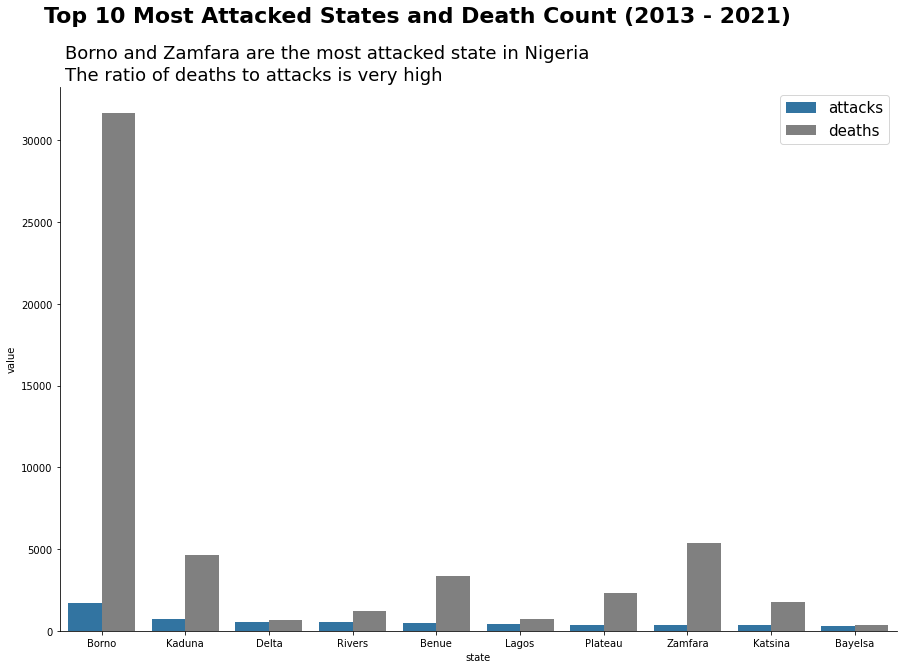

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
b = sns.barplot(data=incidents, x="state", y="value", hue="incident", ax = ax, palette=["#1f77b4", "grey"])
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
#fig.set(xlabel=None)
plt.legend(fontsize=15)
fig.text(0.13, 0.92, "Borno and Zamfara are the most attacked state in Nigeria", fontsize=18)
fig.text(0.13, 0.89, "The ratio of deaths to attacks is very high", fontsize=18)
fig.text(0.11, 0.97, "Top 10 Most Attacked States and Death Count (2013 - 2021)", fontsize=22, fontweight="semibold");

From the plots above we can observe that the top attacked states are (**Borno and Zamfara**) 
In Borno, the following food items are sown maize, yam, cassava, cowpea, sorghum, millet, sweet potato and rice. While millet, sorghum, and maize are sown in Zamfara.

Insecurity in these part of the country would hinder the proper production and transportation of food items to other part of the country which leads to inflation and price imbalance.

### **Influence of Economic Indicators**
An economic indicator is a metric used to assess, measure, and evaluate the overall state of health of the macroeconomy.
The economic indicators for Nigeria in the last three Years (2019 - 2021) is shown below




In [ ]:
economic = pd.read_csv("economic-indicators.csv")
economic

,Year,Poverty rate,Unemployment rate,Underemployment rate,Consumer Price Index (CPI) inflation rate
0,2019,40.1,23.1,20.1,11.98
1,2020,42.5,27.1,28.6,15.75
2,2021,44.5,33.3,22.8,17.75


We can observe that the health of the country is declining and increase in CPI inflation rate

A consumer price index is estimated as a series of summary measures of the period-to-period proportional change in the prices of a fixed set of consumer goods and services of constant quantity and characteristics, acquired, used or paid for by the reference population.

All these indications have affected the prices of food in Nigeria 





